/var/folders/7c/wcdx5cvj5q93j42gwr1mndg40000gn/T/ipykernel_16911/126829720.py:7: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/7c/wcdx5cvj5q93j42gwr1mndg40000gn/T/ipykernel_16911/126829720.py:7: DtypeWarning:

Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/7c/wcdx5cvj5q93j42gwr1mndg40000gn/T/ipykernel_16911/126829720.py:7: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



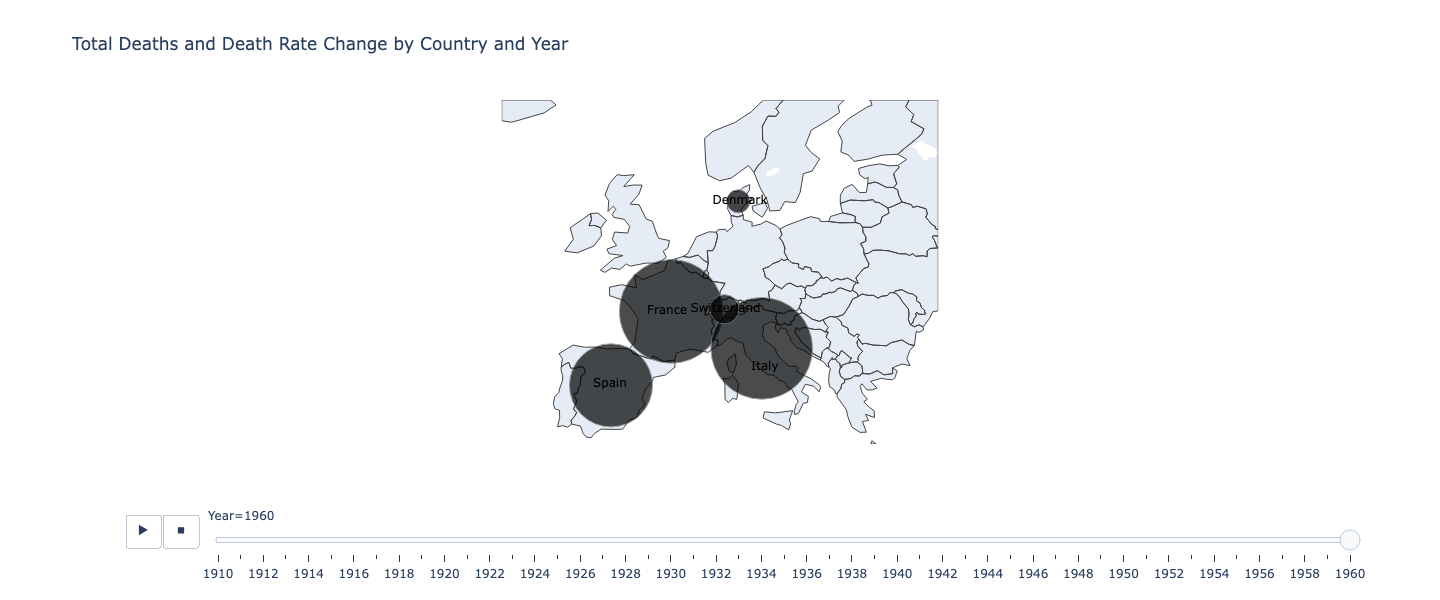

In [54]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

# Function to read and merge CSV files
def read_and_merge_csvs(filenames):
    dfs = [pd.read_csv(f) for f in filenames]
    return pd.concat(dfs)

# Function to clean and process the data
def clean_and_process_data(df):
    selected_cols = ['PopName', 'Year', 'Age', 'Deaths']
    df = df[selected_cols]
    df = df.loc[(df['Year'] >= 1910) & (df['Year'] <= 1960)]
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df = df.dropna(subset=['Age'])
    df['PopName'] = df['PopName'].replace(popname_dict)
    df = df.rename(columns={'PopName': 'Country', 'Deaths': 'Total'})
    return df

# Function to calculate the total deaths and change in death rates
def calculate_total_and_change(df):
    grouped_data = df.groupby(['Country', 'Year']).agg({'Total': 'sum'}).reset_index()
    grouped_data['Change'] = grouped_data.groupby('Country')['Total'].pct_change()
    return grouped_data

# Function to create and display the map visualization
def create_and_show_map(grouped_data):
    fig = px.scatter_geo(grouped_data, locations="Country", locationmode="country names",
                         size="Total", color="Change", animation_frame="Year",
                         projection="natural earth", hover_name="Country", hover_data=["Total"],
                         size_max=100, range_color=(-0.3, 0.3),
                         color_continuous_scale=px.colors.diverging.RdYlGn_r,
                         title="Total Deaths and Death Rate Change by Country and Year",
                         scope='europe')
    
    fig.update_geos(
        lataxis_range=[35, 65],
        lonaxis_range=[-15, 30]
    )

    # Add country names as text scatter plot
    country_coords = {
        'Switzerland': [46.8182, 8.2275],
        'Denmark': [56.2639, 9.5018],
        'Spain': [40.4637, -3.7492],
        'France': [46.603354, 1.888334],
        'Italy': [41.8719, 12.5674]
    }

    for country, coords in country_coords.items():
        fig.add_trace(go.Scattergeo(
            lat=[coords[0]],
            lon=[coords[1]],
            text=[country],
            mode='text',
            showlegend=False,
            textfont=dict(size=12, color='black')
        ))


    fig.update_layout(height=600, width=1000, coloraxis_colorbar_tickfont=dict(size=10))
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
    fig.layout.sliders[0].active = len(fig.layout.sliders[0].steps) - 1
    fig.for_each_trace(lambda trace: trace.update(marker=dict(line=dict(width=1, color='gray'))))

    fig.show()



# Main part of the script
# Define filenames and country name mapping
filenames = ['CHEdeath.csv', 'DNKdeath.csv', 'ESPdeath.csv', 'FRACNPdeath.csv', 'ITAdeath.csv']
popname_dict = {'CHE': 'Switzerland', 'DNK': 'Denmark', 'ESP': 'Spain', 'FRACNP': 'France', 'ITA': 'Italy'}

# Read and merge data from CSV files
df = read_and_merge_csvs(filenames)
# Clean and process the data
df = clean_and_process_data(df)
# Calculate total deaths and change in death rates
grouped_data = calculate_total_and_change(df)
# Create and display the map visualization
create_and_show_map(grouped_data)


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

filenames = ['CHEdeath.csv', 'DNKdeath.csv', 'ESPdeath.csv', 'FRACNPdeath.csv', 'ITAdeath.csv']
dfs = [pd.read_csv(f) for f in filenames]
merged_data = dfs

# Merge all DataFrames into a single DataFrame
merged_data = pd.concat(merged_data, ignore_index=True)

# Preprocess the data
popname_dict = {'CHE': 'Switzerland', 'DNK': 'Denmark', 'ESP': 'Spain', 'FRACNP': 'France', 'ITA': 'Italy'}
merged_data['Age'] = pd.to_numeric(merged_data['Age'], errors='coerce')
merged_data = merged_data.dropna(subset=['Age'])
merged_data['PopName'] = merged_data['PopName'].replace(popname_dict)
merged_data['Sex'] = merged_data['Sex'].replace({'f': 'Female', 'm': 'Male'})

# Group by age
merged_data['Age_group'] = pd.cut(merged_data['Age'], np.arange(0, 101, 20), right=False)
merged_data['Age_group'] = merged_data['Age_group'].astype(str)

# Define function to draw treemap
def draw_treemap(year):
    filtered_data = merged_data[(merged_data['Year'] == year)]
    grouped_data = filtered_data.groupby(['Year', 'PopName', 'Sex', 'Age_group'], as_index=False)['Deaths'].sum()

    fig = px.treemap(grouped_data,
                     path=['PopName', 'Sex', 'Age_group'],
                     values='Deaths',
                     color='Age_group',
                     color_discrete_map={'[0, 20)': 'rgba(51, 204, 255, 0.8)',
                                         '[20, 40)': 'rgba(51, 153, 255, 0.8)',
                                         '[40, 60)': 'rgba(51, 102, 255, 0.8)',
                                         '[60, 80)': 'rgba(51, 51, 255, 0.8)',
                                         '[80, 100)': 'rgba(0, 0, 255, 0.8)'},
                     title=f'Treemap of Deaths by Country, Gender and Age Group in {year}',
                     width=1200,
                     height=800)
    
    fig.update_traces(marker=dict(line=dict(width=0.5, color='rgba(255, 255, 255, 0.5)')))
    fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
    fig.show()

# Create slider
year_slider = widgets.IntSlider(min=1910, max=1960, step=1, value=1910, description='Year:')

# Create interactive plot using widgets.interactive
interactive_plot = widgets.interactive(draw_treemap, year=year_slider)

# Display the interactive plot
display(interactive_plot)


/var/folders/7c/wcdx5cvj5q93j42gwr1mndg40000gn/T/ipykernel_16911/942810296.py:8: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/7c/wcdx5cvj5q93j42gwr1mndg40000gn/T/ipykernel_16911/942810296.py:8: DtypeWarning:

Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/7c/wcdx5cvj5q93j42gwr1mndg40000gn/T/ipykernel_16911/942810296.py:8: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



interactive(children=(IntSlider(value=1910, description='Year:', max=1960, min=1910), Output()), _dom_classes=…